In [23]:
import pandas as pd
import zipfile
import pickle
import nltk
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import train_test_spilt
#from sklearn.feature_extraction.text import TfidVectorizer
#from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer # notice the spelling with the f before Vectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LinearRegression# notice the Caps on the M
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score,precision_score

In [2]:
z = zipfile.ZipFile("C:/Users/KISHORE KATARIYA/Downloads/YouTube-Spam-Collection-v1.zip")
psy= pd.read_csv(z.open("Youtube01-Psy.csv"))
Katy= pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAO= pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem= pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira= pd.read_csv(z.open("Youtube05-Shakira.csv"))

In [3]:
data = pd.concat([psy,Katy,LMFAO,Eminem,Shakira])
data.drop(["COMMENT_ID","DATE","AUTHOR"],axis=1,inplace=True)
data.sample(5)

,CONTENT,CLASS
242,View 851.247.920<br /><br /> Best youtube Vide...,1
22,Show your AUBURN PRIDE HERE: http://www.teespr...,1
37,http://9gag.com/gag/aAVpwj9/ =)﻿,1
54,YAY IM THE 11TH COMMENTER!!!!! ...,1
431,some classsic :))))﻿,0


# DATA CLEANING

In [4]:
data.isnull().sum()


CONTENT    0
CLASS      0
dtype: int64

In [5]:
data.duplicated().sum()

196

In [6]:
data=data.drop_duplicates(keep='first')

In [7]:
data.duplicated().sum()

0

# EDA

In [8]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


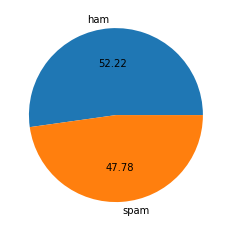

In [9]:
import matplotlib.pyplot as plt
plt.pie(data['CLASS'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
#DATA is balanced

# Data Preprocessing
    - Lower case
    - Tokenization
    - Removing Special Characters
    - Removing Stop words and punctutations

In [11]:
from nltk.corpus import stopwords
import string

In [12]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return " ".join(y)

In [13]:
transform_text('Hi who is this , I am Pankaj?')

'hi pankaj'

In [14]:
data['X']=data['CONTENT'].apply(transform_text)

In [15]:
data.head()

,CONTENT,CLASS,X
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check tube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,hey guys check new channel first vid us monkey...
2,just for test I have to say murdev.com,1,test say
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shaking sexy ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch check


# MODEL BUILDING

In [429]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [430]:
X = tfidf.fit_transform(data['X']).toarray()

In [431]:
X.shape

(1760, 3371)

In [432]:
y =data['CLASS'].values

In [433]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2)


In [434]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [435]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7414772727272727
[[150  36]
 [ 55 111]]
0.7551020408163265


In [436]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8806818181818182
[[171  15]
 [ 27 139]]
0.9025974025974026


In [437]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7926136363636364
[[185   1]
 [ 72  94]]
0.9894736842105263


In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [439]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [440]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb,
    'BNB':bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc
}

In [441]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [442]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9119318181818182
Precision -  0.9856115107913669
For  KN
Accuracy -  0.6590909090909091
Precision -  0.9791666666666666
For  MNB
Accuracy -  0.8806818181818182
Precision -  0.9025974025974026
For  BNB
Accuracy -  0.7926136363636364
Precision -  0.9894736842105263
For  DT
Accuracy -  0.8806818181818182
Precision -  0.9920634920634921
For  LR
Accuracy -  0.8977272727272727
Precision -  0.9710144927536232
For  RF
Accuracy -  0.9176136363636364
Precision -  0.9659863945578231


In [443]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [444]:
performance_df

,Algorithm,Accuracy,Precision
4,DT,0.880682,0.992063
3,BNB,0.792614,0.989474
0,SVC,0.911932,0.985612
1,KN,0.659091,0.979167
5,LR,0.897727,0.971014
6,RF,0.917614,0.965986
2,MNB,0.880682,0.902597


In [445]:
import pickle
pickle.dump(tfidf,open('vectorizer_final.pkl','wb'))
pickle.dump(dtc,open('model_final.pkl','wb'))